In [1]:
%pip install arm_pyart

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install radtraq

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [37]:
%conda install -c conda-forge cmweather -y

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/aabdelbak/anaconda3

  added / updated specs:
    - cmweather


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cmweather-0.3.1            |     pyhd8ed1ab_0          43 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          43 KB

The following NEW packages will be INSTALLED:

  cmweather          conda-forge/noarch::cmweather-0.3.1-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install conda==23.11.0

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement conda==23.11.0 (from versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16)
ERROR: No matching distribution found for conda==23.11.0
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install protobuf==3.19.0

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install numpy
%pip install xarray
%pip install netCDF4
%pip install cartopy
%pip install metpy
%pip install pyart
%pip install siphon
%pip install cmweather

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [1]:
import numpy as np
import act.io.armfiles
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy
from matplotlib.dates import DateFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
from pyart.testing import get_test_data
import fsspec
from metpy.plots import USCOUNTIES
import warnings
warnings.filterwarnings("ignore")
import glob
import os

In [3]:
import siphon
from siphon.catalog import TDSCatalog
import xarray as xr
from xarray.backends import NetCDF4DataStore
from datetime import datetime
import sys
import cmweather

In [4]:
# Function used to make sure there are not any times without any data
def catch_bad_file(cds):
    try:
        return cds.remote_access(use_xarray=True)
    except:
        print("Exception: ", sys.exc_info()[0])

In [5]:
# Accessing the Thredds server
cat_url = 'https://thredds.crocus-urban.org/thredds/catalog/neiu-mrrpro-a1/catalog.html'
cat = TDSCatalog(cat_url)
print(list(cat.datasets.keys()))

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [70]:
# Testing if all set up right

In [6]:
# list comprehension for files only doing 7 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[1:7]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [7]:
dsets

[<xarray.Dataset>
 Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                              spectrum_n_samples: 32)
 Coordinates:
   * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
   * time                    (time) datetime64[ns] 2023-06-01T02:00:00.0011051...
     elevation               (time) float32 ...
     azimuth                 (time) float32 ...
 Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
 Data variables: (12/31)
     volume_number           int32 ...
     time_coverage_start     |S128 ...
     time_coverage_end       |S128 ...
     time_reference          |S128 ...
     instrument_type         |S128 ...
     transfer_function       (range) float64 ...
     ...                      ...
     ML                      (time, range) float64 ...
     SNR                     (time, range) float32 ...
     index_spectra           (time, range) float64 ...
     spectrum_raw            (time, n

In [8]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [9]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-01T02:00:00.001105152 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

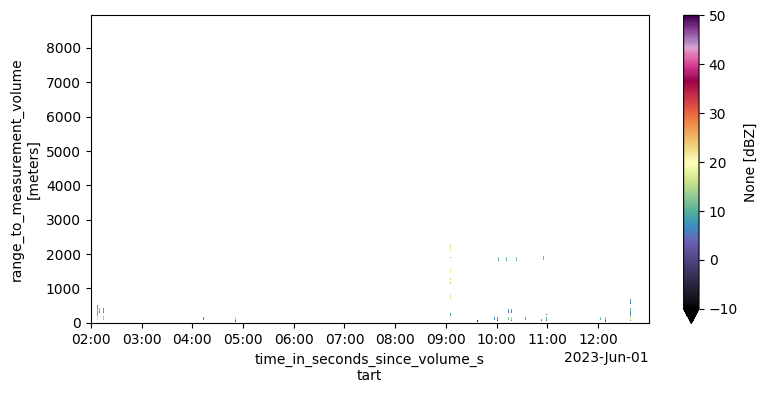

In [10]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)

In [ ]:
# Plotting files begins here with June 15th

In [46]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[142:151]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [47]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [48]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,  1.77633873, 11.67283761, ...,         nan,
                nan,         nan],
       [        nan, 10.20469245, 19.15122221, ...,         nan,
                nan,         nan],
       [        nan, 14.71877921, 23.65124998, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-15T03:00:00.001085952 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

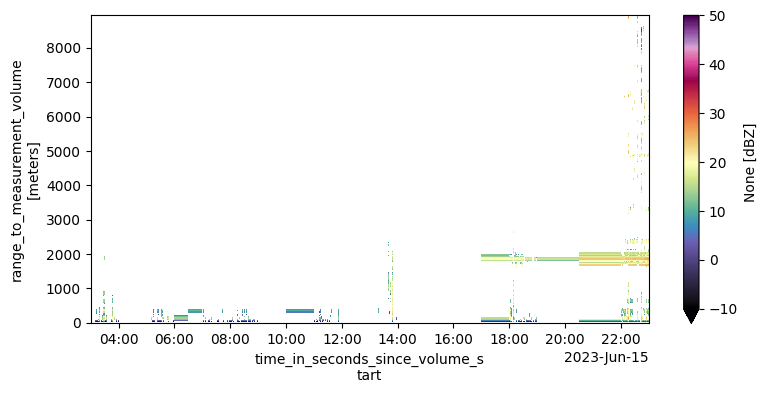

In [49]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 15.png', dpi=300, bbox_inches='tight')


In [41]:
# list comprehension for files only doing 13 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[151:164]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [42]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [43]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[        nan,         nan, 16.77892255, ...,         nan,
                nan,         nan],
       [        nan,  9.63531239,         nan, ...,         nan,
                nan,         nan],
       [        nan,  9.60982204, 16.73484456, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-16T05:00:00.001086976 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

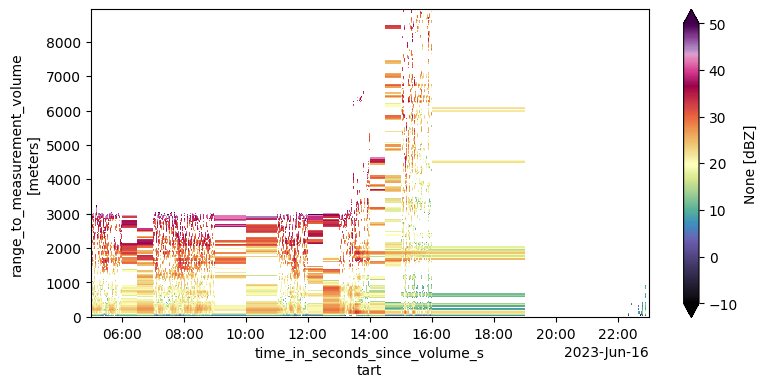

In [45]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 16.png', dpi=300, bbox_inches='tight')

In [55]:
# list comprehension for files only doing 12 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[164:176]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [56]:
cat.datasets

['latest.xml', 'crocus-neiu-mrrpro-a1-20230601.020000.nc', 'crocus-neiu-mrrpro-a1-20230601.040000.nc', 'crocus-neiu-mrrpro-a1-20230601.060000.nc', 'crocus-neiu-mrrpro-a1-20230601.090000.nc', 'crocus-neiu-mrrpro-a1-20230601.100000.nc', 'crocus-neiu-mrrpro-a1-20230601.120000.nc', 'crocus-neiu-mrrpro-a1-20230601.140000.nc', 'crocus-neiu-mrrpro-a1-20230601.160000.nc', 'crocus-neiu-mrrpro-a1-20230601.190000.nc', 'crocus-neiu-mrrpro-a1-20230601.210000.nc', 'crocus-neiu-mrrpro-a1-20230601.230000.nc', 'crocus-neiu-mrrpro-a1-20230602.020000.nc', 'crocus-neiu-mrrpro-a1-20230602.040000.nc', 'crocus-neiu-mrrpro-a1-20230602.060000.nc', 'crocus-neiu-mrrpro-a1-20230602.090000.nc', 'crocus-neiu-mrrpro-a1-20230602.100000.nc', 'crocus-neiu-mrrpro-a1-20230602.120000.nc', 'crocus-neiu-mrrpro-a1-20230602.140000.nc', 'crocus-neiu-mrrpro-a1-20230602.180000.nc', 'crocus-neiu-mrrpro-a1-20230602.190000.nc', 'crocus-neiu-mrrpro-a1-20230602.230000.nc', 'crocus-neiu-mrrpro-a1-20230603.020000.nc', 'crocus-neiu-mrrp

In [57]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[        nan, -3.05275323,  6.96276891, ...,         nan,
                nan,         nan],
       [        nan, -1.21521457,  8.16666131, ...,         nan,
                nan,         nan],
       [        nan, -3.03191613,  6.82089014, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-17T03:00:00.001089024 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

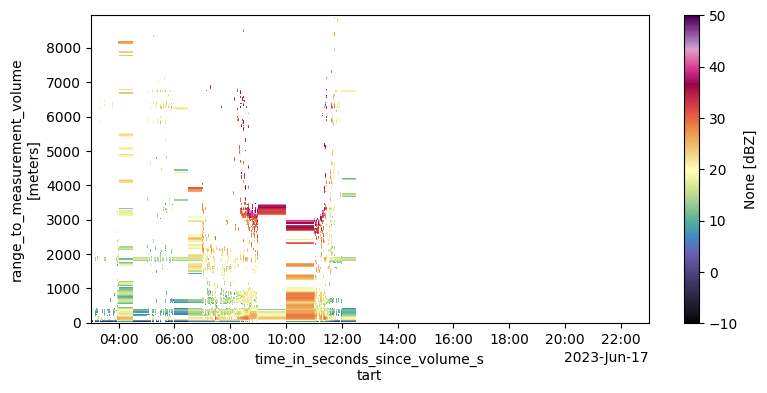

In [58]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 17.png', dpi=300, bbox_inches='tight')

In [63]:
# list comprehension for files only doing 12 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[176:188]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [64]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3600, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-18T01:00:00.001084928 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

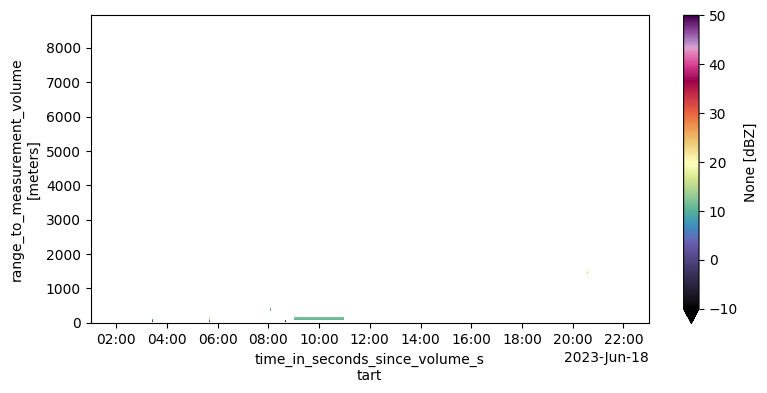

In [65]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 18.png', dpi=300, bbox_inches='tight')

In [69]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[188:198]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [70]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3600, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-19T01:00:00.001088 ... 2023-06-1...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

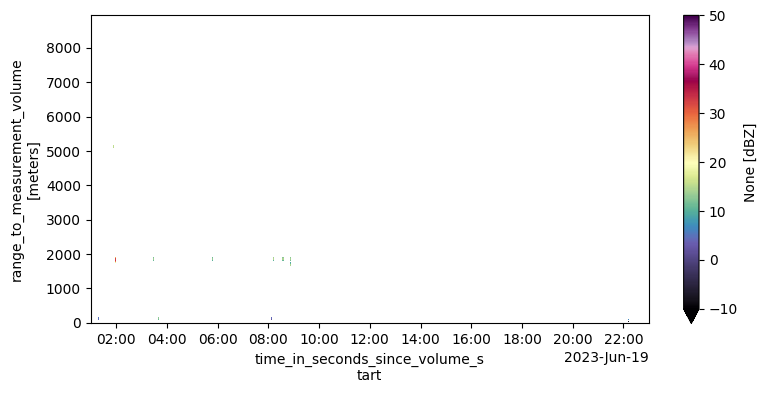

In [71]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 19.png', dpi=300, bbox_inches='tight')

In [73]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[198:209]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [74]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-20T00:00:00.001086976 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

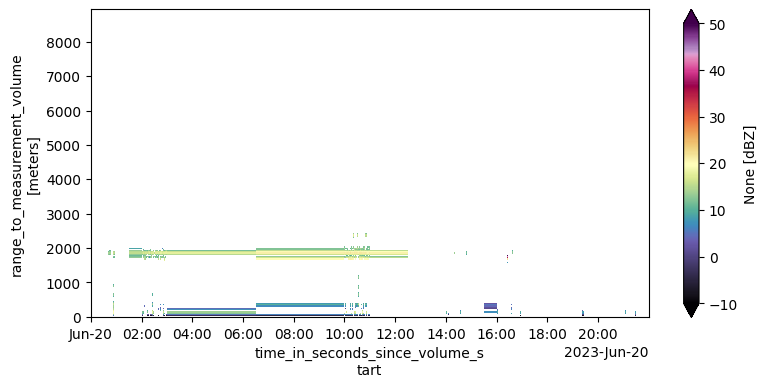

In [75]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 2o.png', dpi=300, bbox_inches='tight')

In [77]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[209:219]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [78]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-21T00:00:00.001102848 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

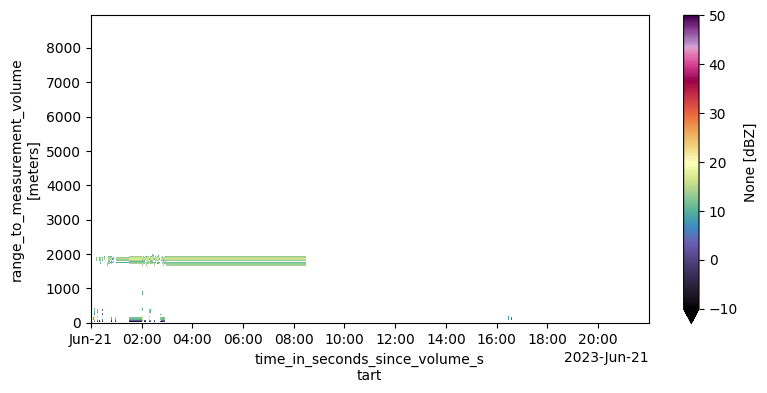

In [79]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 21.png', dpi=300, bbox_inches='tight')

In [12]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[219:227]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [13]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-22T00:00:00.001089024 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

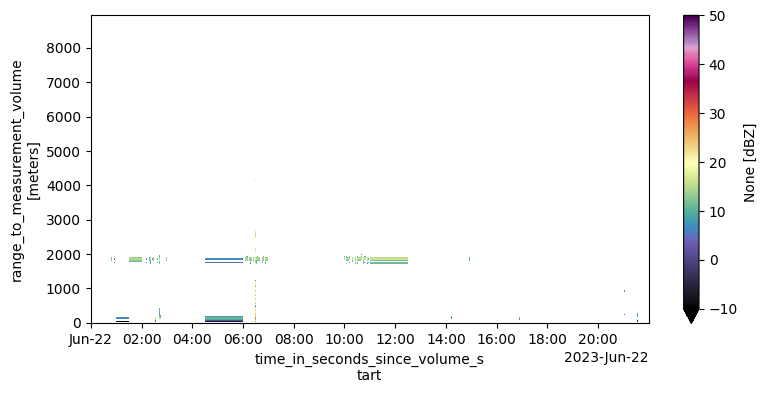

In [14]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 22.png', dpi=300, bbox_inches='tight')

In [16]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[227:238]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [17]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-23T00:00:00.001081088 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

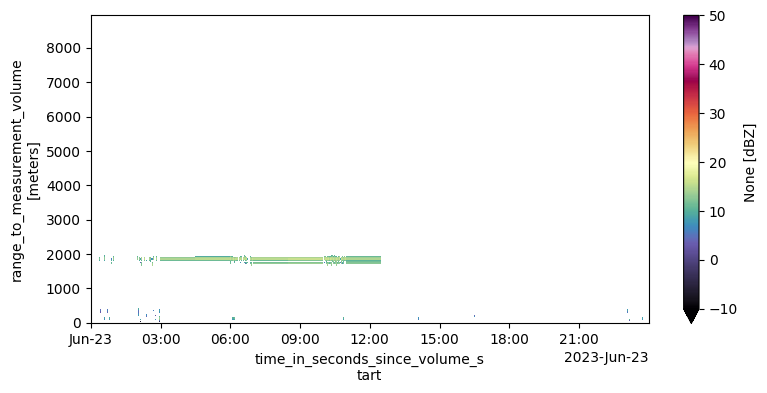

In [18]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 23.png', dpi=300, bbox_inches='tight')

In [22]:
# list comprehension for files only doing 3 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[238:241]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [23]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1080, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-26T19:00:00.001090048 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

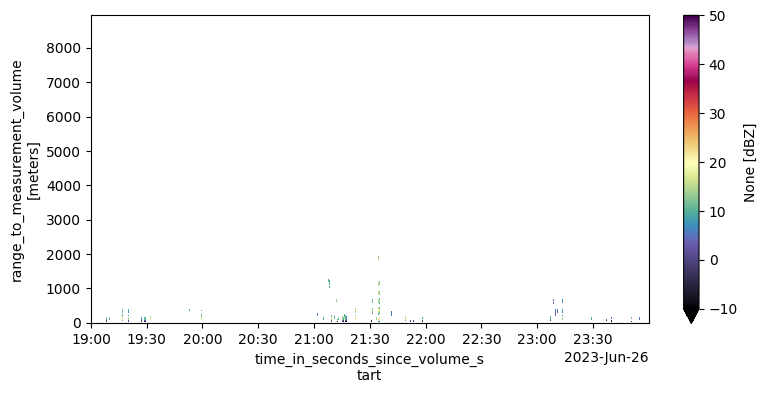

In [24]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 26.png', dpi=300, bbox_inches='tight')

In [26]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[241:249]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [27]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-27T00:00:00.001090048 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

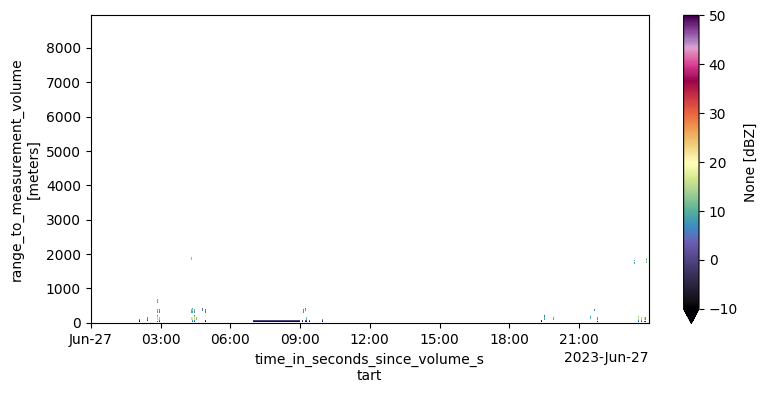

In [28]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 27.png', dpi=300, bbox_inches='tight')

In [30]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[249:260]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [31]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[        nan, -3.06237374,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-28T04:00:00.001082880 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

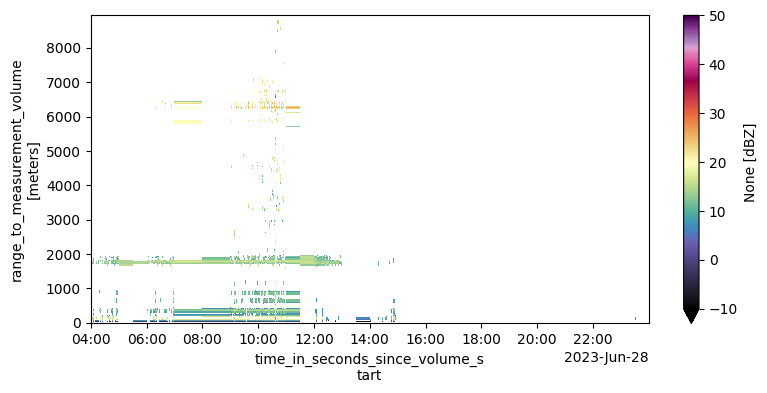

In [32]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 28.png', dpi=300, bbox_inches='tight')

In [35]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[260:271]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [36]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-29T02:00:00.001085952 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

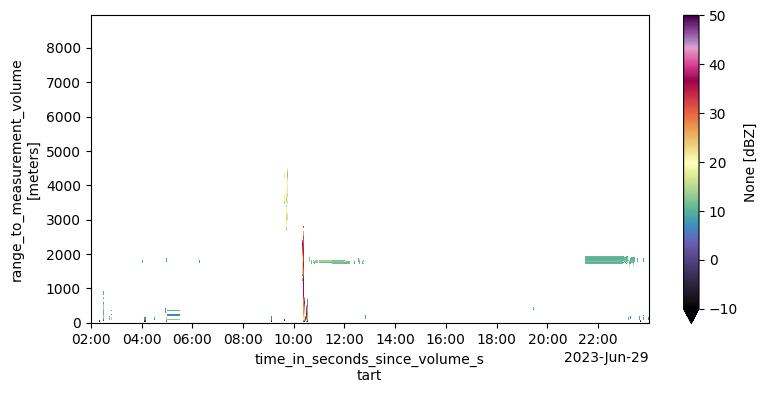

In [37]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 29.png', dpi=300, bbox_inches='tight')

In [38]:
# list comprehension for files only doing 13 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[271:284]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [39]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3600, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-06-30T01:00:00.001078016 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

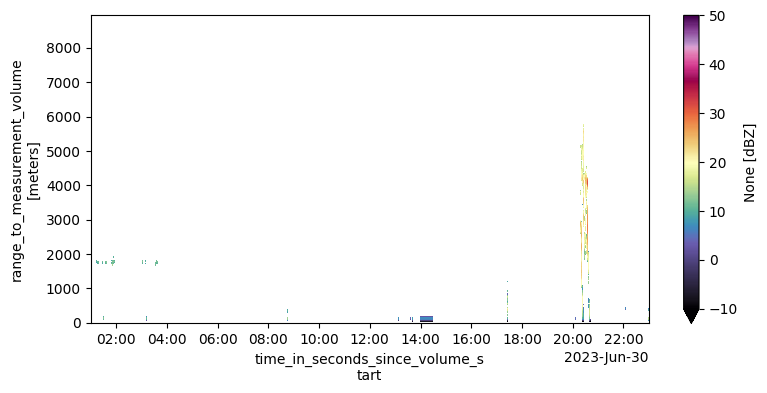

In [40]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('June 30.png', dpi=300, bbox_inches='tight')

In [ ]:
# Start plotting at July 12

In [43]:
# list comprehension for files only doing 1 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[284:285]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [44]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 360, range: 256)>
[92160 values with dtype=float64]
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-12T12:00:00.002731008 ... 2023-0...
    elevation  (time) float32 ...
    azimuth    (time) float32 ...
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

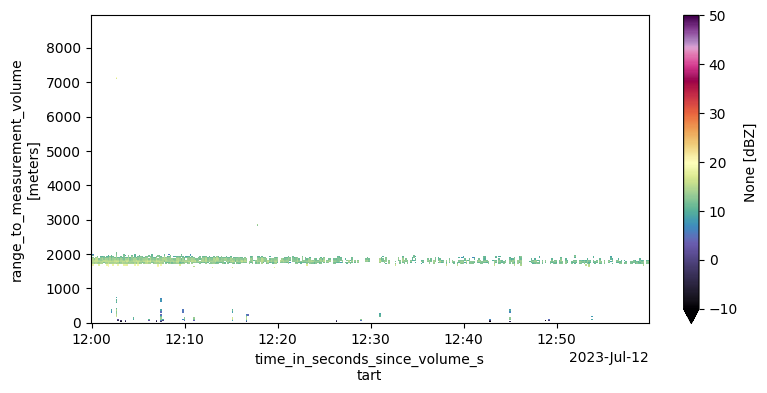

In [45]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 12.png', dpi=300, bbox_inches='tight')

In [50]:
# list comprehension for files only doing 3 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[286:289]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [51]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 720, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -3.35969491,  4.52265649, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.87320109, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-14T14:00:00.006700032 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

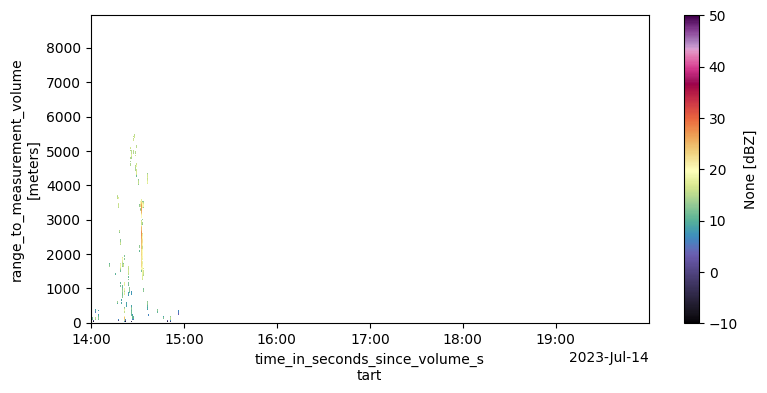

In [52]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 14.png', dpi=300, bbox_inches='tight')

In [54]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[289:298]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [55]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-15T02:00:00.006705920 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

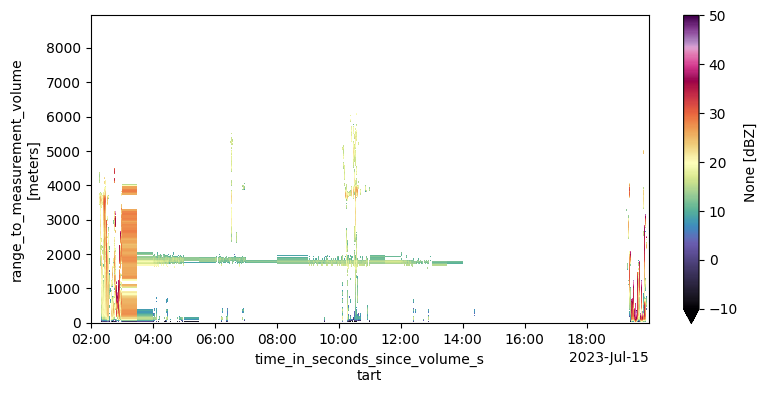

In [56]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 15.png', dpi=300, bbox_inches='tight')

In [58]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[298:308]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [59]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-16T04:00:00.006705920 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

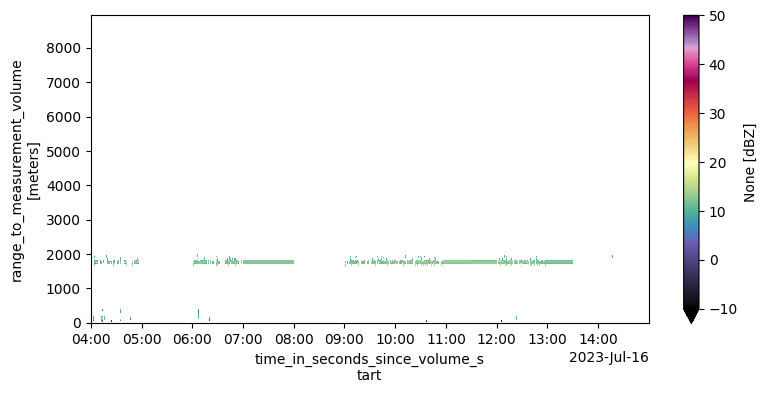

In [60]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 16.png', dpi=300, bbox_inches='tight')

In [62]:
# list comprehension for files only doing 9 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[308:317]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [63]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2160, range: 256)>
array([[        nan, -1.25362084,  6.41133437, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-17T04:00:00.006699008 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

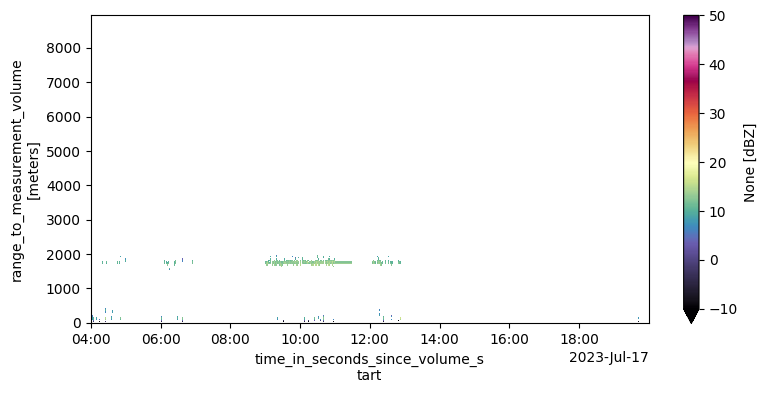

In [64]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 17.png', dpi=300, bbox_inches='tight')

In [66]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[317:327]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [67]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-18T00:00:00.006702848 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

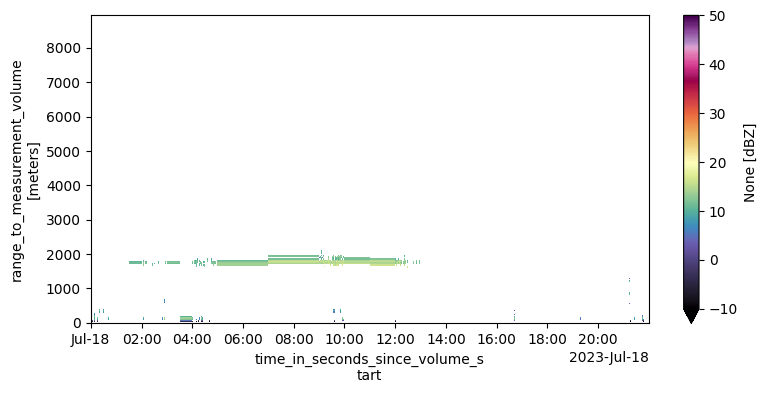

In [68]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 18.png', dpi=300, bbox_inches='tight')

In [80]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[327:338]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [81]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-19T00:00:00.009184 ... 2023-07-1...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

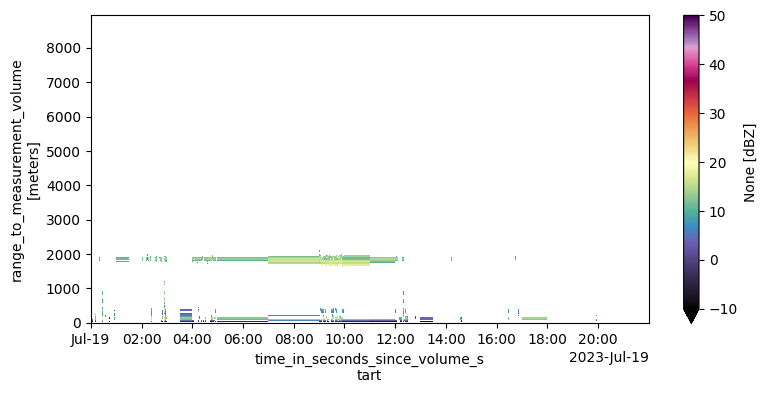

In [82]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 19.png', dpi=300, bbox_inches='tight')

In [86]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[338:349]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [87]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2520, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-20T01:00:00.009118976 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

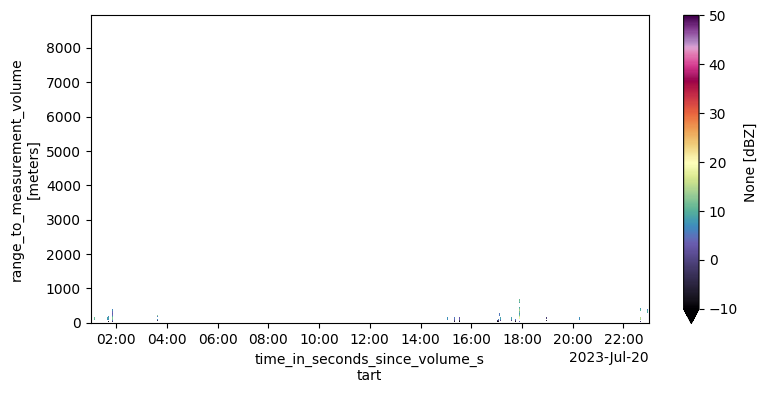

In [88]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 20.png', dpi=300, bbox_inches='tight')

In [89]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[349:359]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [90]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-21T01:00:00.009125888 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

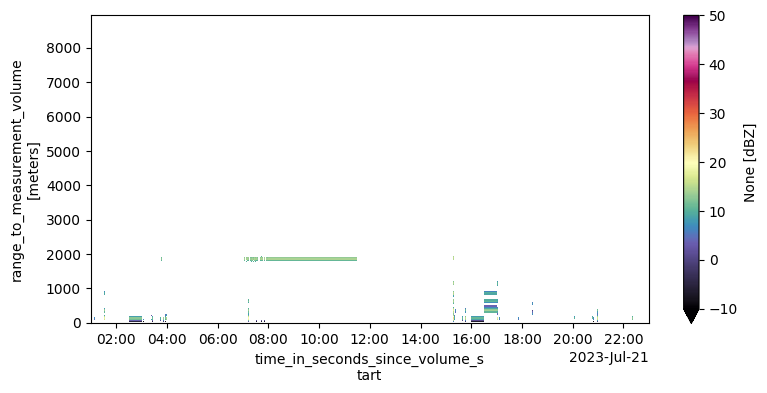

In [91]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 21.png', dpi=300, bbox_inches='tight')

In [92]:
# list comprehension for files only doing 10 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[359:369]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>


In [93]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-22T01:00:00.009128192 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

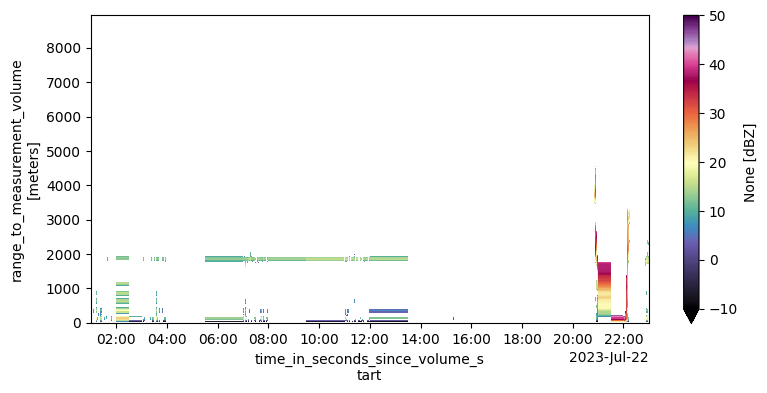

In [94]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 22.png', dpi=300, bbox_inches='tight')

In [97]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[369:380]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [98]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[        nan,  5.87940979, 14.97378667, ...,         nan,
                nan,         nan],
       [        nan,  5.38051774, 14.8467217 , ...,         nan,
                nan,         nan],
       [        nan,  4.96249376, 14.77768256, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-23T01:00:00.009149952 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

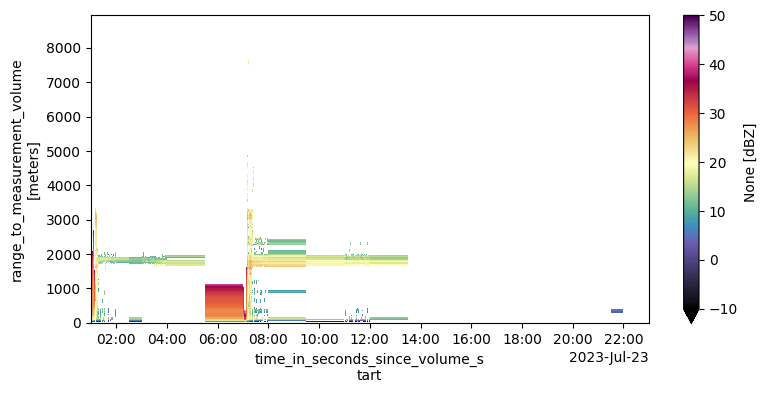

In [99]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 23.png', dpi=300, bbox_inches='tight')

In [100]:
# list comprehension for files only doing 12 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[380:392]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [101]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3240, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-24T01:00:00.009125888 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

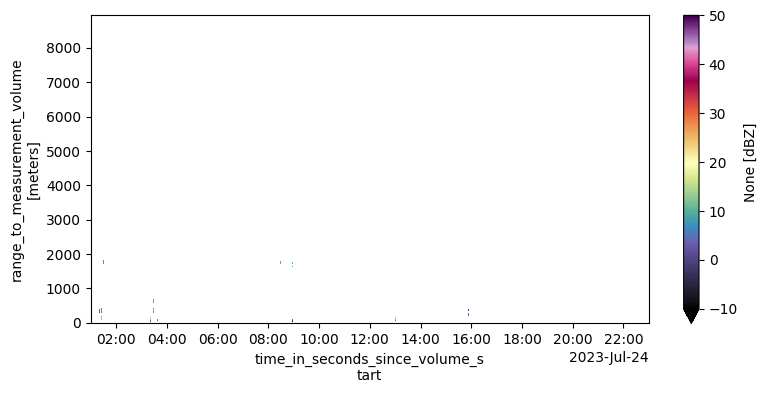

In [102]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 24.png', dpi=300, bbox_inches='tight')

In [106]:
# list comprehension for files only doing 11 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[392:403]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [107]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan, -6.00221012,  1.56254606, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-25T01:00:00.009134080 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

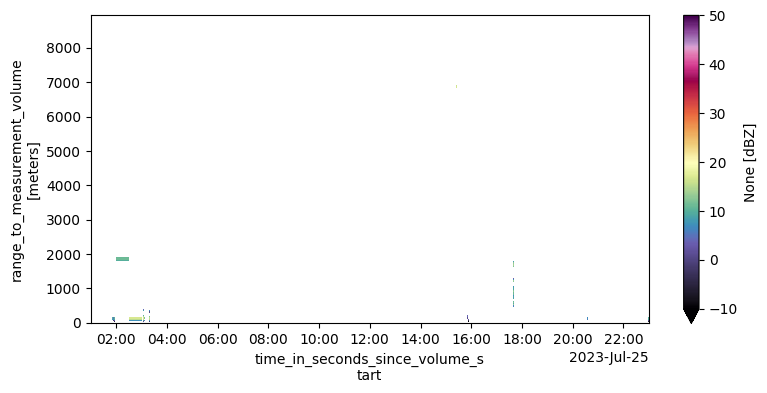

In [108]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 25.png', dpi=300, bbox_inches='tight')

In [109]:
# list comprehension for files only doing 13 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[403:416]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [110]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 3600, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-26T01:00:00.009154048 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

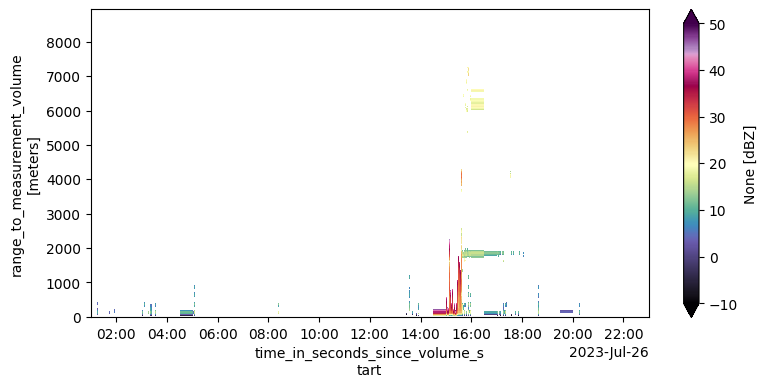

In [111]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 26.png', dpi=300, bbox_inches='tight')

In [113]:
# list comprehension for files only doing 12 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[416:428]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [114]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 2880, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-27T01:00:00.009132032 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

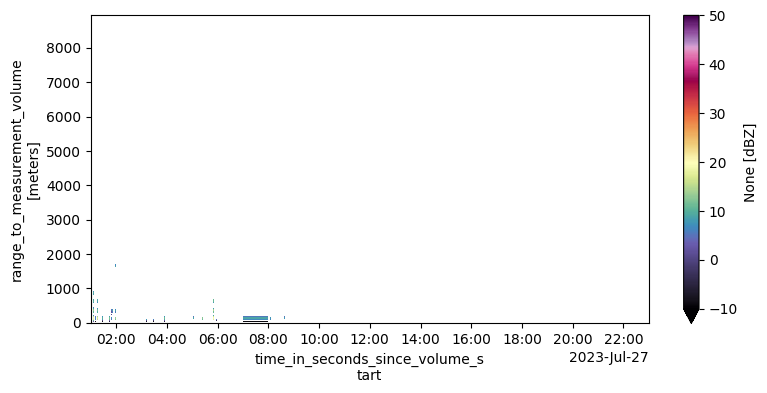

In [115]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 27.png', dpi=300, bbox_inches='tight')

In [12]:
# list comprehension for files only doing 8 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[428:436]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>
Exception:  <class 'requests.exceptions.HTTPError'>


In [13]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 1440, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-28T05:00:00.009128192 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

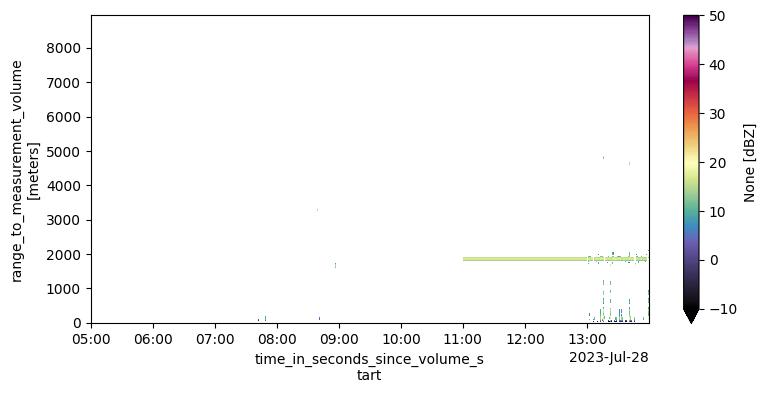

In [14]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 28.png', dpi=300, bbox_inches='tight')

In [16]:
# list comprehension for files only doing 1 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[436:437]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [17]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 360, range: 256)>
[92160 values with dtype=float64]
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-30T14:00:00.009135872 ... 2023-0...
    elevation  (time) float32 ...
    azimuth    (time) float32 ...
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

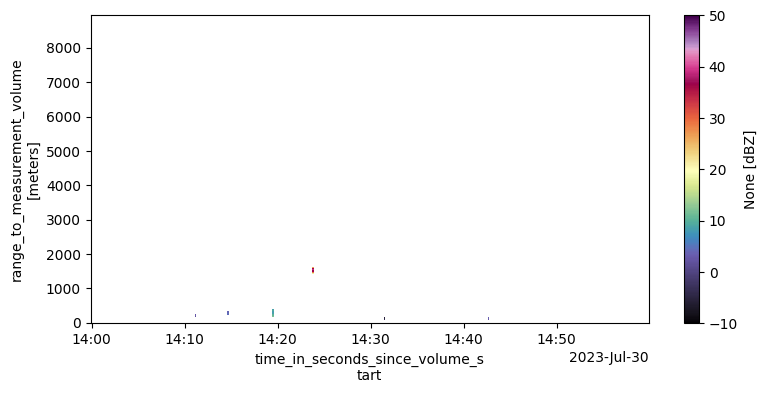

In [18]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 30.png', dpi=300, bbox_inches='tight')

In [20]:
# list comprehension for files only doing 2 files for now
# Will have to adjust for time frames
dsets = [catch_bad_file(cds)
         for cds in cat.datasets[437:439]] # eventually want to use the whole catalog here
# removes empty datasets
ds_non_none = [x for x in dsets if x is not None]
ds = xr.combine_by_coords(ds_non_none, combine_attrs='override')

In [21]:
ds['Ze']

<xarray.DataArray 'Ze' (time: 720, range: 256)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * range      (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time       (time) datetime64[ns] 2023-07-31T12:00:00.009138944 ... 2023-0...
    elevation  (time) float32 90.0 90.0 90.0 90.0 90.0 ... 90.0 90.0 90.0 90.0
    azimuth    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    standard_name:     equivalent_reflectivity_factor
    long_name:         None
    units:             dBZ
    field_folds:       false
    fold_limit_lower:  0.0
    fold_limit_upper:  0.0
    thresholding_xml:  None
    legend_xml:        None
    is_discreet:       false
    _ChunkSizes:       [  1 256]

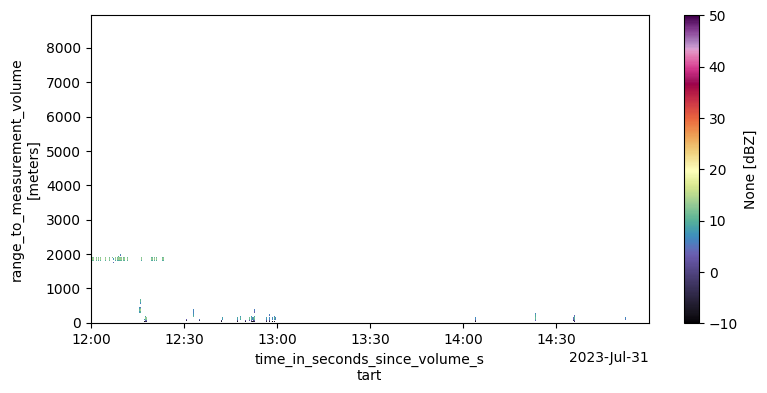

In [22]:
plt.figure(figsize=(9, 4))
ds['Ze'].plot(x='time', cmap='ChaseSpectral', vmin=-10, vmax=50)
plt.savefig('July 31.png', dpi=300, bbox_inches='tight')

In [19]:
ds = cat.datasets[437:439]
ds

[crocus-neiu-mrrpro-a1-20230731.120000.nc,
 crocus-neiu-mrrpro-a1-20230731.140000.nc]

In [ ]:
# Extra plotting figures/styles

In [23]:
ds = cat.datasets[2]
ds = ds.remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-06-01T04:00:00.0010859...
    elevation               (time) float32 ...
    azimuth                 (time) float32 ...
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 ...
    ...                      ...
    ML                      (time, range) float64 ...
    SNR                     (time, range) float32 ...
    index_spectra           (time, range) float64 ...
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 ...
    N                       (time, n_spectra, spectrum_n_samples) float64 ...
    D                       (n_spectra, spectrum_n_samples) float64 ...
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          None
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

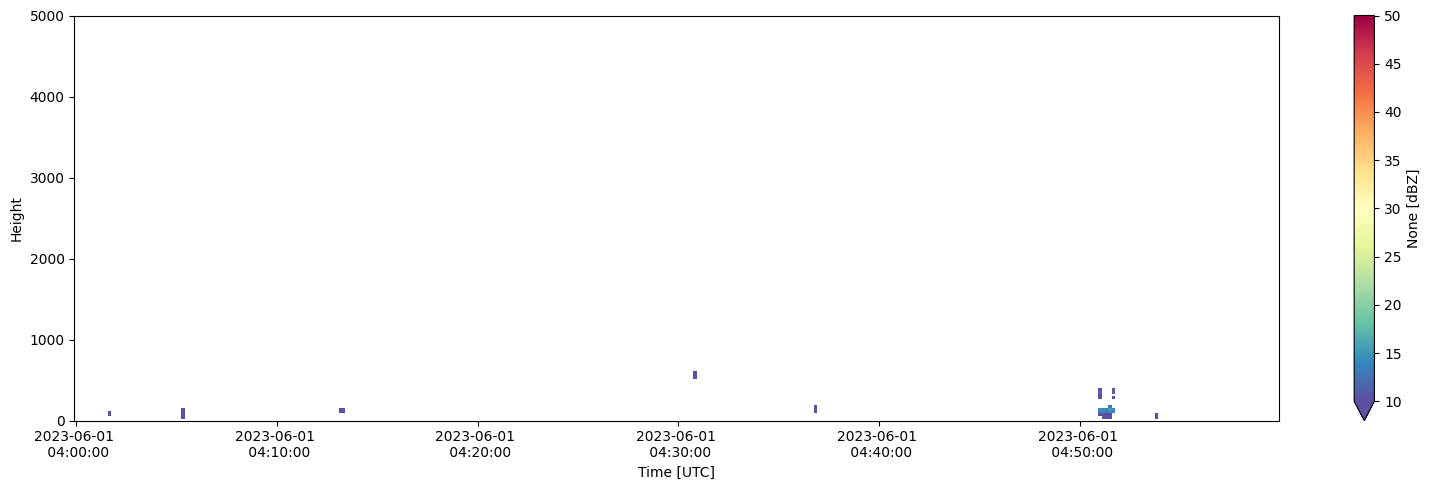

In [24]:
fig = plt.figure(figsize=(16,5))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Height')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()


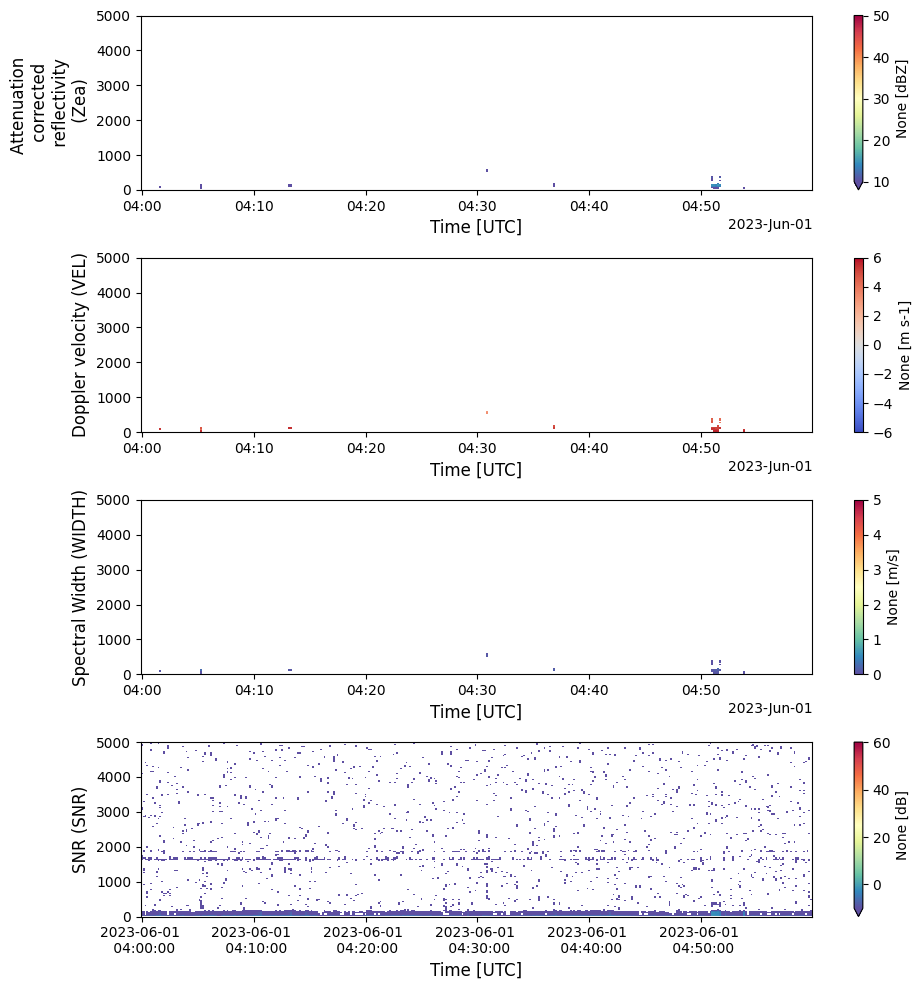

In [25]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()